$\large{\textbf{Image Denoising}}$ 

$\textbf{Abderrahim}$ $\textbf{MEHDAOUI}$, $\textbf{Adnan}$ $\textbf{ZEDDOUN}$ 


$\textbf{Question 1}$ :

Le problème d'optimisation est 
$$\underset{x}{min}  \frac{1}{2}\| x-y\|^{2} + f(Lx)$$

La fonction $g = f\circ L$ est la composée d'une fonction linéaire avec une fonction convexe, propre et semi-continue inférieur, ainsi g est aussi propre, convexe et semi continue inférieur.
Ce problème revient exactement à calculer l'opérateur proximal pour la fonction $g$.


$\textbf{Question 2}$ :

On a l'expression de l'opérateur proximal pour la fonction $g = f\circ L$ :
$$prox_{f\circ L} = Id - \mu^{-1}L^{*}\circ(Id-prox_{\mu f})\circ L $$

Or notre opérateur $L$ est orthogonal, on a alors danc notre cas $L^{*}L=LL^{*}=Id$ et $prox_{f\circ L}(y) = L^{*}prox_{f}(Ly)=L^{-1}prox_{f}(Ly) $

$\textbf{Question 3}$ :

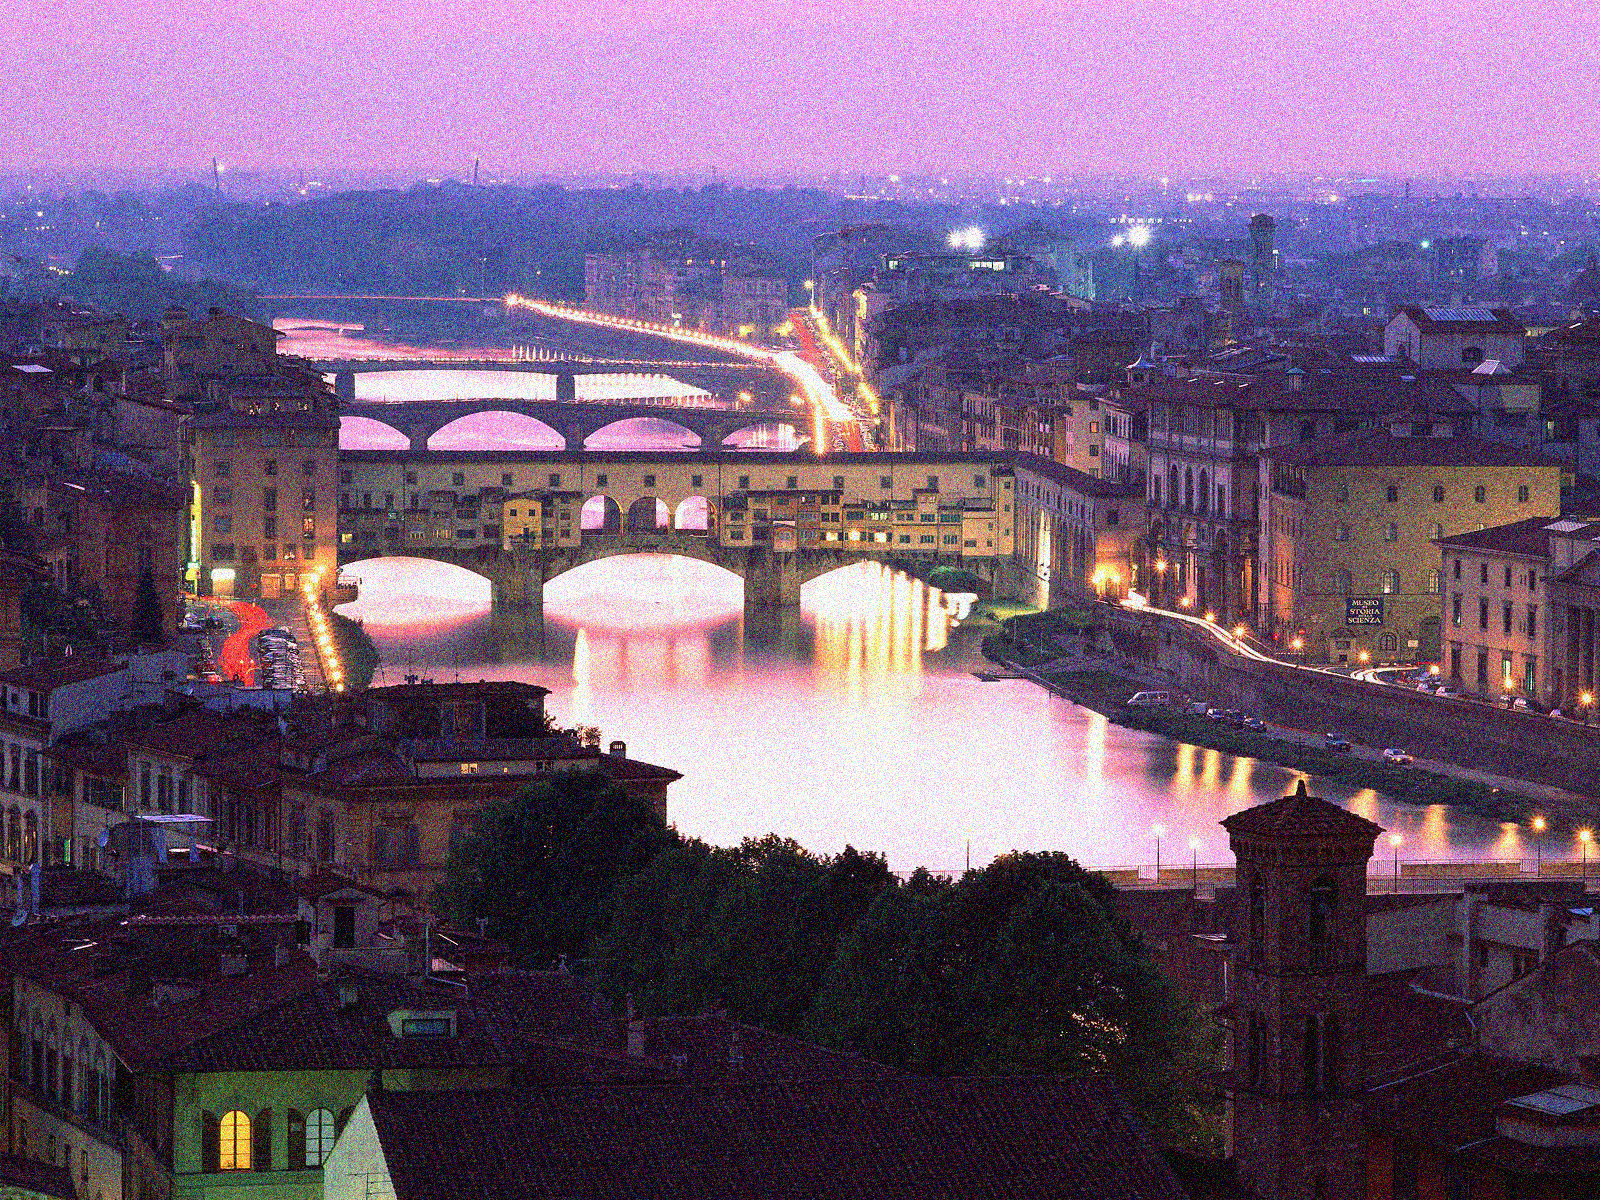

In [2]:
from PIL import Image
import numpy as np
from numpy import linalg
import math
import random
import matplotlib.pyplot as plt


imgpil = Image.open("C:/Users/Adnan/Videos/TP1 LSD/florence.jpg")
imgpil

im = np.array(imgpil)
im2 = np.array(imgpil)
im = im + np.random.normal(0,30,(im.shape[0],im.shape[1],3)) #ajout d'un bruit blanc
im = np.clip(im,0,255).astype(np.uint8)
Image.fromarray(im,'RGB')

$\textbf{Question 4}$ :

In [120]:
import pywt
L = pywt.wavedec2(im, 'db8', level=1, axes=(0, 1)) #décomposition de l'image avec la wavelet "db8" 

#Fonction proximal
def prox(xi,q,chi):
    if q==1:
        prox1 = np.sign(xi)*max(abs(xi)-chi,0)
        return prox1
    if q==4/3:
        epsilon = np.sqrt(xi**2+(chi**3)*256/729)
        prox43 = xi+(1/(3*2**(1/3)))*(4*chi)*((epsilon-xi)**(1/3)-(epsilon+xi)**(1/3))
        return prox43
    if q==3/2:
        prox32 = xi + (1-np.sqrt(1+16*abs(xi)/(9*chi**2)))*9*(chi**2)*np.sign(xi)/8
        return prox32
    if q==2:
        prox2 = xi/(1+2*chi)
        return prox2
    if q==3:
        prox3 = np.sign(xi)*(np.sqrt(1+12*chi*abs(xi))-1)/(6*chi)
        return prox3
    if q==4:
        epsilon2 = np.sqrt((xi**2)+(1/(27*chi)))
        prox4 = ((epsilon2+xi)/(8*chi))**(1/3) - ((epsilon2-xi)/(8*chi))**(1/3)
        return prox4
        

tab1 = L[0]
tab2 = L[1][0]
tab3 = L[1][1]
tab4 = L[1][2]

prox1 = tab1
prox2 = np.zeros([np.shape(tab2)[0],np.shape(tab2)[1],np.shape(tab2)[2]])
prox3 = np.zeros([np.shape(tab3)[0],np.shape(tab3)[1],np.shape(tab3)[2]])
prox4 = np.zeros([np.shape(tab4)[0],np.shape(tab4)[1],np.shape(tab4)[2]])

#Fonction pour calculer le MSE pour différentes valeurs de chi et q
def f(chi,q):

    for i in range(np.shape(tab2)[0]):
        for j in range(np.shape(tab2)[1]):
            for k in range(np.shape(tab2)[2]):
                x = tab2[i,j,k]
                prox2[i,j,k] = prox(x,q,chi)

    for i in range(np.shape(tab3)[0]):
        for j in range(np.shape(tab3)[1]):
            for k in range(np.shape(tab3)[2]):
                x = tab3[i,j,k]
                prox3[i,j,k] = prox(x,q,chi)
            
    for i in range(np.shape(tab4)[0]):
        for j in range(np.shape(tab4)[1]):
            for k in range(np.shape(tab4)[2]):
                x = tab4[i,j,k]
                prox4[i,j,k] = prox(x,q,chi)
    
    rec = pywt.waverec2([prox1,[prox2,prox3,prox4]],'db8',axes=(0, 1))  
    #rec = np.clip(rec,0,255).astype(np.uint8)
    MSE = np.linalg.norm(im2-rec)/np.linalg.norm(im2)
    return MSE

X = np.arange(1, 50, 9)
Y1 = [ f(x,1) for x in X ]
Y2 = [ f(x,4/3) for x in X ]
Y3 = [ f(x,3/2) for x in X ]
Y4 = [ f(x,2) for x in X ]
Y5 = [ f(x,3) for x in X ]
Y6 = [ f(x,4) for x in X ]

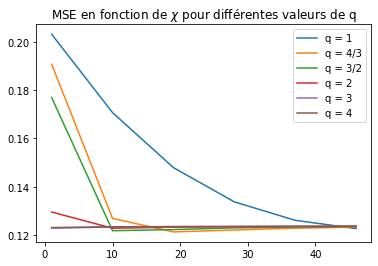

In [128]:
plt.plot(X, Y1,label="q = 1")
plt.plot(X, Y2,label="q = 4/3")
plt.plot(X, Y3,label="q = 3/2")
plt.plot(X, Y4,label="q = 2")
plt.plot(X, Y5,label="q = 3")
plt.plot(X, Y6,label="q = 4")

plt.legend()
plt.title("MSE en fonction de $\chi$ pour différentes valeurs de q")
plt.show()


In [134]:
typwave = ['haar', 'db8', 'sym8', 'coif5']
q = 2 #on fixe q=2

#Fonction pour calculer le MSE pour différentes valeurs de chi et différents types de wavelets
def f2(chi,typ):
    L = pywt.wavedec2(im, typ, level=1, axes=(0, 1))
    tab1 = L[0]
    tab2 = L[1][0]
    tab3 = L[1][1]
    tab4 = L[1][2]

    prox1 = tab1
    prox2 = np.zeros([np.shape(tab2)[0],np.shape(tab2)[1],np.shape(tab2)[2]])
    prox3 = np.zeros([np.shape(tab3)[0],np.shape(tab3)[1],np.shape(tab3)[2]])
    prox4 = np.zeros([np.shape(tab4)[0],np.shape(tab4)[1],np.shape(tab4)[2]])
    
    for i in range(np.shape(tab2)[0]):
        for j in range(np.shape(tab2)[1]):
            for k in range(np.shape(tab2)[2]):
                x = tab2[i,j,k]
                prox2[i,j,k] = prox(x,q,chi)

    for i in range(np.shape(tab3)[0]):
        for j in range(np.shape(tab3)[1]):
            for k in range(np.shape(tab3)[2]):
                x = tab3[i,j,k]
                prox3[i,j,k] = prox(x,q,chi)
            
    for i in range(np.shape(tab4)[0]):
        for j in range(np.shape(tab4)[1]):
            for k in range(np.shape(tab4)[2]):
                x = tab4[i,j,k]
                prox4[i,j,k] = prox(x,q,chi)
    
    rec = pywt.waverec2([prox1,[prox2,prox3,prox4]],typ,axes=(0, 1))  
    #rec = np.clip(rec,0,255).astype(np.uint8)
    MSE = np.linalg.norm(im2-rec)/np.linalg.norm(im2)
    return MSE

U = np.arange(1, 50, 9)
Z1 = [ f2(x,typwave[0]) for x in U ]
Z2 = [ f2(x,typwave[1]) for x in U ]
Z3 = [ f2(x,typwave[2]) for x in U ]
Z4 = [ f2(x,typwave[3]) for x in U ]

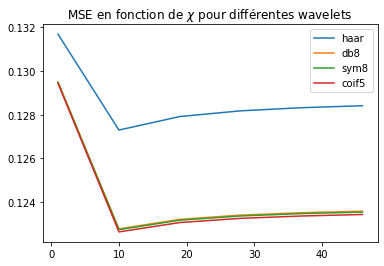

In [137]:
plt.plot(U, Z1,label="haar")
plt.plot(U, Z2,label="db8")
plt.plot(U, Z3,label="sym8")
plt.plot(U, Z4,label="coif5")


plt.legend()
plt.title("MSE en fonction de $\chi$ pour différentes wavelets")
plt.show()


In [20]:
#Fonction pour obtenir l'image débruitée en fonction de
#@im l'image bruitée
#@wavelets le type de wavelets, par exemple 'db8' ou 'haar'
#@chi le paramètre de régularisation. Dans ce TP nous l'avons considérer entre 1 et 50
#@q le type de norme que l'on souhaite utiliser pour notre proximal (q=1,4/3,3/2,2,3,4)

def f3(im,wavelets,chi,q):
    L = pywt.wavedec2(im, wavelets, mode='symmetric', level=1, axes=(0, 1))
    tab1 = L[0]
    tab2 = L[1][0]
    tab3 = L[1][1]
    tab4 = L[1][2]

    prox1 = tab1
    prox2 = np.zeros([np.shape(tab2)[0],np.shape(tab2)[1],np.shape(tab2)[2]])
    prox3 = np.zeros([np.shape(tab3)[0],np.shape(tab3)[1],np.shape(tab3)[2]])
    prox4 = np.zeros([np.shape(tab4)[0],np.shape(tab4)[1],np.shape(tab4)[2]])
    
    for i in range(np.shape(tab2)[0]):
        for j in range(np.shape(tab2)[1]):
            for k in range(np.shape(tab2)[2]):
                x = tab2[i,j,k]
                prox2[i,j,k] = prox(x,q,chi)

    for i in range(np.shape(tab3)[0]):
        for j in range(np.shape(tab3)[1]):
            for k in range(np.shape(tab3)[2]):
                x = tab3[i,j,k]
                prox3[i,j,k] = prox(x,q,chi)
            
    for i in range(np.shape(tab4)[0]):
        for j in range(np.shape(tab4)[1]):
            for k in range(np.shape(tab4)[2]):
                x = tab4[i,j,k]
                prox4[i,j,k] = prox(x,q,chi)
    
    rec = pywt.waverec2([prox1,[prox2,prox3,prox4]],wavelets,axes=(0, 1))  
    return rec

rec1 = f3(im,'db8',10,1)
rec2 = f3(im,'db8',10,4/3)
rec3 = f3(im,'db8',10,3/2)
rec4 = f3(im,'db8',10,2)
rec5 = f3(im,'db8',10,3)
rec6 = f3(im,'db8',10,4)

In [25]:
rectest1 = np.clip(rec1,0,255).astype(np.uint8)
rectest2 = np.clip(rec2,0,255).astype(np.uint8)
rectest3 = np.clip(rec3,0,255).astype(np.uint8)
rectest4 = np.clip(rec4,0,255).astype(np.uint8)
rectest5 = np.clip(rec5,0,255).astype(np.uint8)
rectest6 = np.clip(rec6,0,255).astype(np.uint8)

(0.0, 1.0, 0.0, 1.0)

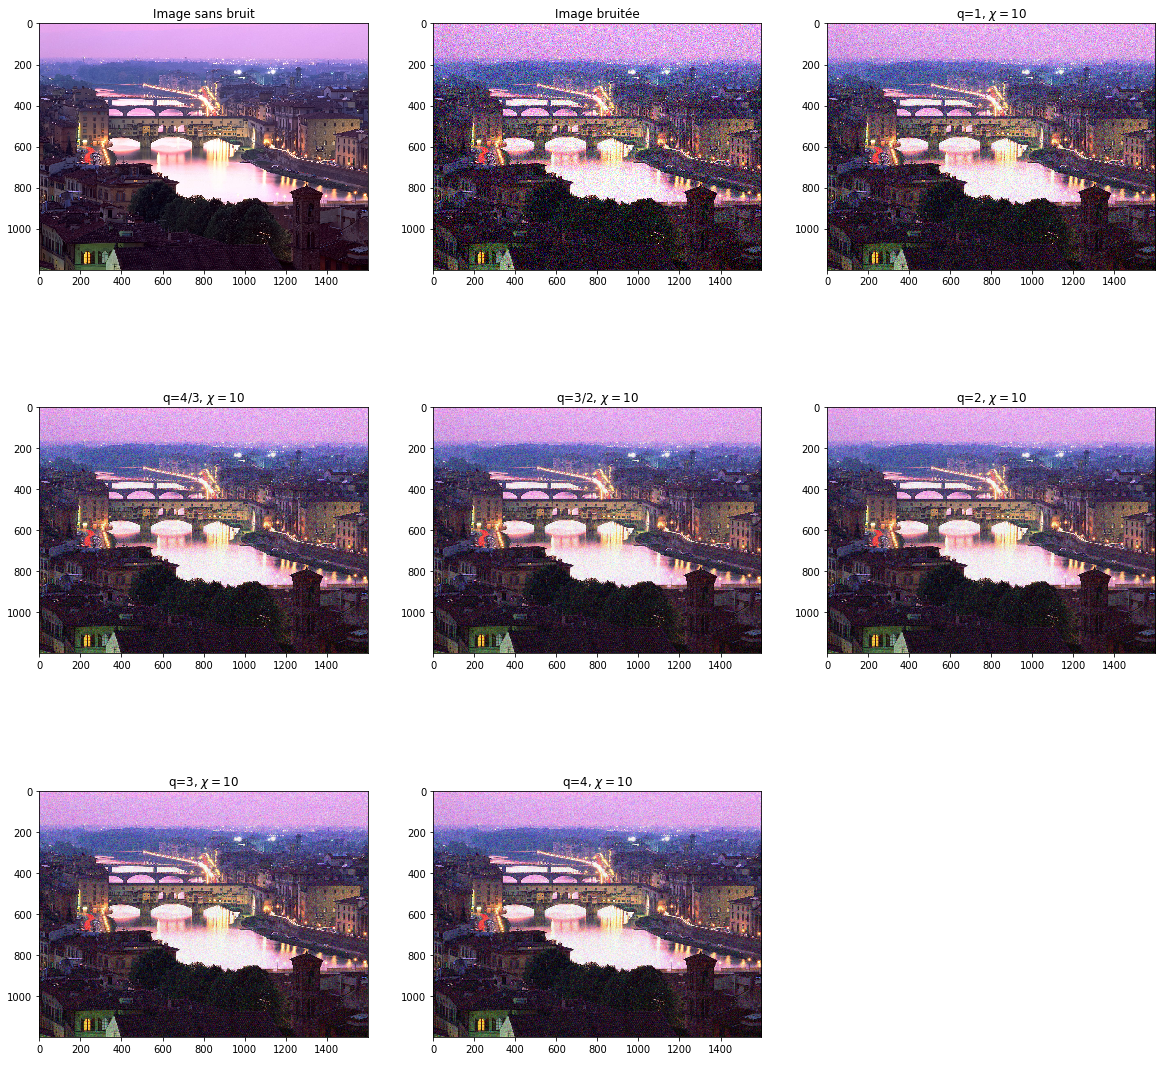

In [34]:
fig ,a = plt.subplots(3,3,figsize=(20,20))

a[0,0].set_title('Image sans bruit')
a[0,0].imshow(im2)

a[0,1].set_title('Image bruitée')
a[0,1].imshow(im)

a[0,2].set_title('q=1, $\chi=10$')
a[0,2].imshow(rectest1)

a[1,0].set_title('q=4/3, $\chi=10$')
a[1,0].imshow(rectest2)

a[1,1].set_title('q=3/2, $\chi=10$')
a[1,1].imshow(rectest3)

a[1,2].set_title('q=2, $\chi=10$')
a[1,2].imshow(rectest4)

a[2,0].set_title('q=3, $\chi=10$')
a[2,0].imshow(rectest5)

a[2,1].set_title('q=4, $\chi=10$')
a[2,1].imshow(rectest6)

a[2,2].axis('off')


$\textbf{Commentaires}$ : 
On constate que les images débruitées pour $q=3/2;2;3;4$ sont meilleures que pour $q=1;4/3$. Ceci confirme bien notre graphique représentant le MSE en fonction de $\chi$ pour différentes valeurs de q. Ainsi, le choix d'une norme adéquate est crucial pour débruiter au mieux l'image. Pour améliorer notre débruitage, il aurait été possible d'aller plus loin en considérant différents niveaux ("level" dans la fonction $\textit{pywt.wavedec2}$) de l'image bruitée. 